W mean value is 4.006076391671509
b mean value is 5.060406526098343
<tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([1.])> <tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([1.])>
======== Start Testing ======> Running learning rate: 1


Still running, current step is: 500
Still running, current step is: 1000
Still running, current step is: 1500
Still running, current step is: 2000
Still running, current step is: 2500
Still running, current step is: 3000
Still running, current step is: 3500
Still running, current step is: 4000
Still running, current step is: 4500
Still running, current step is: 5000
Still running, current step is: 5500
Still running, current step is: 6000
Still running, current step is: 6500
Still running, current step is: 7000
Still running, current step is: 7500
Still running, current step is: 8000
Still running, current step is: 8500
Still running, current step is: 9000
Still running, current step is: 9500
Still running, current step is

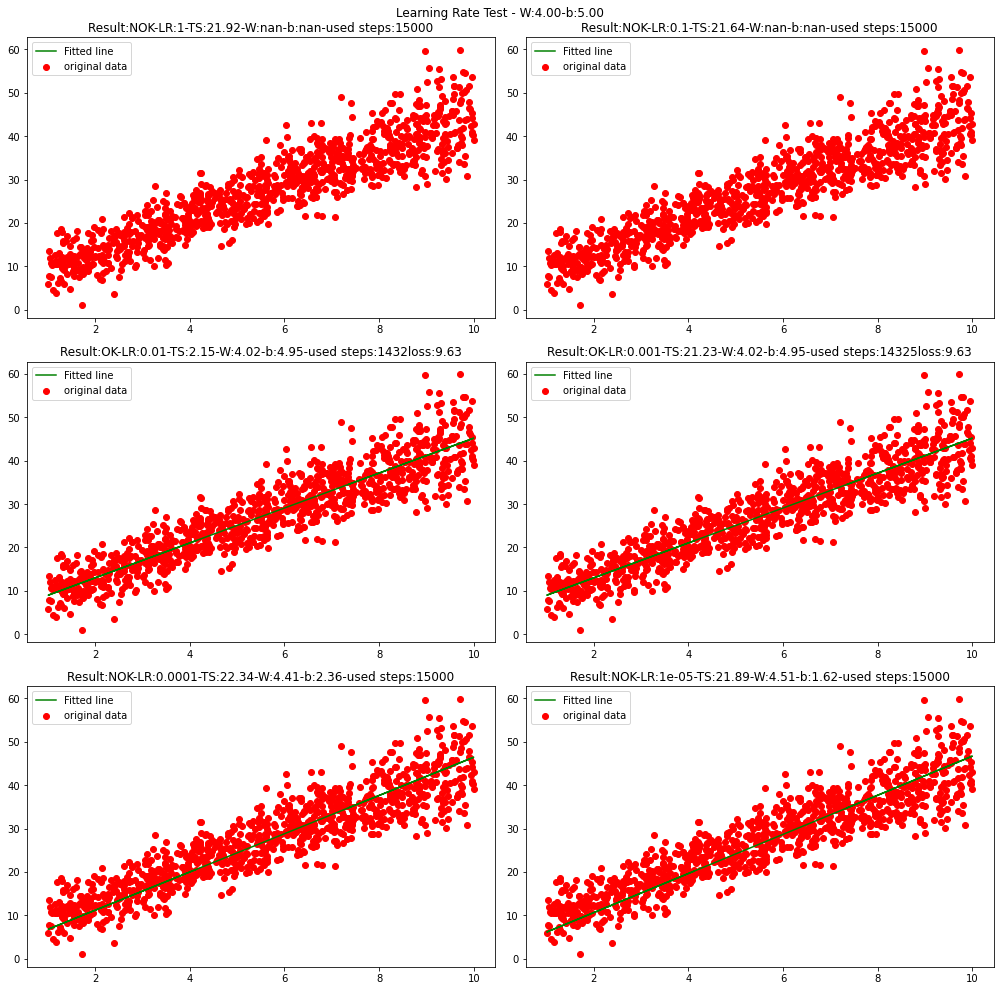

In [10]:
# V4 This program is going to use the same training data and test with different learning rate.
# It is still implementing the class defined.

import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

# This program is going to try to test with linear regression using tensor flow. The object is to determine the optimum learning rate.

class TF_linear_regression:
    def __init__(self, w_loc,w_scale,b_loc,b_scale,x1,x2,w_init,b_init, n_samples):
        self.n_samples=n_samples # number of samples to be used for training data

        # generate random distribution of w and b using normal distribution 
        w_dis = np.random.normal(w_loc, w_scale, n_samples) #given a range, generate samples for w
        b_dis = np.random.normal(b_loc, b_scale, n_samples) #given a range, generate samples for b

        self.w_constant = np.mean(w_dis) # get mean of w
        self.b_constant = np.mean(b_dis) # get mean of b

        print("W mean value is", self.w_constant)
        print("b mean value is", self.b_constant)

        # construct input X and output Y
        self.X = np.random.uniform(x1, x2, n_samples) #given a range, generate samples for x
        self.Y = np.multiply(self.X, w_dis) + b_dis #based on X, W, b, we will have Y (output) as trained data 

        # Define TF variable W and b
        # Instead of using random value, we can use defined initial value of W and b
        self.W = tf.Variable([w_init], dtype=tf.float64) #this W variable is to be determinded by TF
        self.b = tf.Variable([b_init], dtype=tf.float64) #this b variable is to be determinded by TF

        print(self.W, self.b)     
        self.optimizer=None #declare optimizer and initialize it with learning rate 
    
    def lr_optimizer(self,learning_rate):
        self.optimizer=tf.optimizers.SGD(learning_rate)

    def linear_regression(self,x):
        return self.W*x+self.b # construct linear regression model 

    def mean_square(self,y_pred,y_value):
        return tf.reduce_sum(tf.pow(y_pred-y_value,2))/(2*self.n_samples) # calculate mean square 

    def run_optimization(self):
        with tf.GradientTape() as g:
            pred = self.linear_regression(self.X) # based on given X, do a predict
            loss = self.mean_square(pred, self.Y) # calculate the loss 
        gradients = g.gradient(loss, [self.W, self.b]) # use gradient to do differentiation of loss over W and b
        self.optimizer.apply_gradients(zip(gradients, [self.W, self.b])) # update W and b 
#         (tf.optimizers.SGD(learning_rate)).apply_gradients(zip(gradients, [self.W, self.b]))  # update W and b

def main(argv): # use main function to draw figure and compare 
    learning_rate = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001] #the learning rate we want to study
    Cols=2 # number of columes in the figure 
    testResult = "NOK" # identify if the test is OK or not 
    training_step = 15000 # specify training steps 
    used_step= 5000 # this is for figure plot 
    display_step = 500 # to control the display step number 
    Rows = len(learning_rate) // Cols # determine how many rows of subplots in the figure 
    Rows += len(learning_rate) % Cols # the extra row if it's not divided 
    w_loc=4 #local value of w
    w_scale=0.5 #scale of w
    b_loc=5 #local value of b
    b_scale=3 # scale of b
    x_low=1 #low range of x samples 
    x_high=10 #high range of x samples 
    w_init=1 #initial value of W
    b_init=1 # initial value of b 
    n_samples=1000 #number of samples 
    loss_value=0.0

    fig=plt.figure(figsize=(14,14))
    fig.suptitle('Learning Rate Test - W:'+ '%.2f'%w_loc+'-b:'+'%.2f'%b_loc)
    
    # Initialize a object based on defined class 
    tf_lr = TF_linear_regression(w_loc,w_scale,b_loc,b_scale,x_low,x_high,w_init,b_init,n_samples)

    for i in range(len(learning_rate)):

        testResult = "NOK" # reset test result mark each iteration
        loss_value=0.0
        print("======== Start Testing ======> Running learning rate:", learning_rate[i])
        print("\n")
        tf_lr.lr_optimizer(learning_rate[i])
        
        start = time.time()
        for step in range(1, training_step + 1):
            tf_lr.run_optimization()
            if step % display_step == 0:
                print("Still running, current step is:", step)
            if (abs(tf_lr.W - w_loc) < 0.05) & (abs(tf_lr.b-b_loc) < 0.05): #stop execution if w and b are within 5% range
                pred = tf_lr.linear_regression(tf_lr.X)
                loss = tf_lr.mean_square(pred, tf_lr.Y)
                print("Running step======>", step)
                print("Step: %i, loss: %f, W: %F, b: %f" % (step, loss, tf_lr.W.numpy(), tf_lr.b.numpy()))
                testResult = "OK"
                loss_value=loss
                used_step=step
                print("Test is OK!")
                break
        if testResult == "NOK": #not converge within given training steps 
            print("The regression doesn't converge!")
            print("After %d steps, W is %.2f, b is %.2f" % (training_step, tf_lr.W, tf_lr.b))
            used_step=training_step
            
        end = time.time()
       
        spentTime=end-start
        print(f"Runtime of the program is {spentTime}\n\n")
        ax=fig.add_subplot(Rows, Cols, i + 1)
        if testResult=="OK":
            ax.set_title('Result:'+testResult+'-LR:'+str(learning_rate[i])+'-'+'TS:'+ '%.2f' % spentTime+'-W:%.2f'%tf_lr.W+'-b:%.2f'%tf_lr.b+'-used steps:'+str(used_step)+'loss:%.2f'%loss_value)
        else:
            ax.set_title('Result:'+testResult+'-LR:'+str(learning_rate[i])+'-'+'TS:'+ '%.2f' % spentTime+'-W:%.2f'%tf_lr.W+'-b:%.2f'%tf_lr.b+'-used steps:'+str(used_step))
        ax.scatter(tf_lr.X, tf_lr.Y, c='r', label="original data")
        ax.plot(tf_lr.X, np.array(tf_lr.W * tf_lr.X + tf_lr.b), c='g', label='Fitted line')
        ax.legend()
        tf_lr.W = tf.Variable([w_init], dtype=tf.float64) #this W variable is to be determinded by TF
        tf_lr.b = tf.Variable([b_init], dtype=tf.float64) #this b variable is to be determinded by TF
        
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main(sys.argv[1:])